In [203]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [204]:
Image_Width=300
Image_Height=300
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [41]:
from google.colab import drive 
drive.mount('/content/gdrive')
!apt install unzip
!unzip "/content/gdrive/MyDrive/Cannabis/female.zip" -d "/content/gdrive/MyDrive/Cannabis/female"
!unzip "/content/gdrive/MyDrive/Cannabis/male.zip" -d "/content/gdrive/MyDrive/Cannabis/male"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Archive:  /content/gdrive/MyDrive/Cannabis/female.zip
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector2.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector3.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector4.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector5.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector6.svg  
 extracting: /content/gdrive/MyDrive/Cannabis/female/vector7.svg

In [221]:
filenames_males=os.listdir("/content/gdrive/MyDrive/Cannabis/male")
filenames_females=os.listdir("/content/gdrive/MyDrive/Cannabis/female")


categories=[]

for f_name in filenames_males:
        categories.append(1)
for f_female in filenames_females:
        categories.append(0)

df=pd.DataFrame({
    'filename': filenames_males + filenames_females,
    'category':categories
})
"""print(df["category"])"""
"""print(df["filename"])"""


'print(df["filename"])'

In [222]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [223]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 batch_normalization_20 (Bat  (None, 298, 298, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 149, 149, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_21 (Bat  (None, 147, 147, 64)    

In [224]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [225]:
df["category"] = df["category"].replace({0:'female',1:'male'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print(train_df)
print(validate_df)


total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

                                              filename category
0                  blueberry-healthy-flowering-bud.jpg   female
1                                         images34.jpg     male
2                                  EGdPCTBVAAAMrMJ.jpg     male
3    flower_md_farms_photo_credit_jennifer_skog_009...   female
4                                          image3.jpeg     male
..                                                 ...      ...
295                                       images31.jpg     male
296  117903989-detail-of-male-cannabis-plant-with-s...     male
297                                       images70.jpg   female
298  A-female-C-sativa-B-portion-of-the-female-flow...   female
299  depositphotos_439776654-stock-photo-young-new-...     male

[300 rows x 2 columns]
                                             filename category
0                                         vector2.svg   female
1                                        image20.jpeg     male
2                  

In [226]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/gdrive/MyDrive/Cannabis/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)




validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/MyDrive/Cannabis/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/gdrive/MyDrive/Cannabis/test/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 272 validated image filenames belonging to 2 classes.
Found 66 validated image filenames belonging to 2 classes.
Found 4 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 28 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 9 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 296 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [227]:

epochs=32
history = model.fit(
    train_generator, 
    epochs=epochs,
    verbose = 1,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/32
19/20 [===========================>..] - ETA: 0s - loss: 1.5900 - accuracy: 0.5699

20/20 [==============================] - 12s 505ms/step - loss: 1.5900 - accuracy: 0.5699 - val_loss: 1.1747 - val_accuracy: 0.4394 - lr: 0.0010


In [228]:
model.save("model1_Cannabis_10epoch.h5")

In [229]:
test_filenames = os.listdir("/content/gdrive/MyDrive/Cannabis/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
    
})
nb_samples = test_df.shape[0]
print(test_df)

                                            filename
0                                           m-c.jpeg
1                                 .ipynb_checkpoints
2       2026e69d1f18d044e40d85ea402e4ee4--indoor.jpg
3  stock-photo-growing-male-hemp-identify-cannabi...


In [230]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
print(*predict)

1/1 [==============================] - 0s 209ms/step
[0.86885625 0.13114381] [0.1156065 0.8843935] [0.89198256 0.10801747] [0.674417   0.32558295]


In [231]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'male': 1, 'female': 0 })

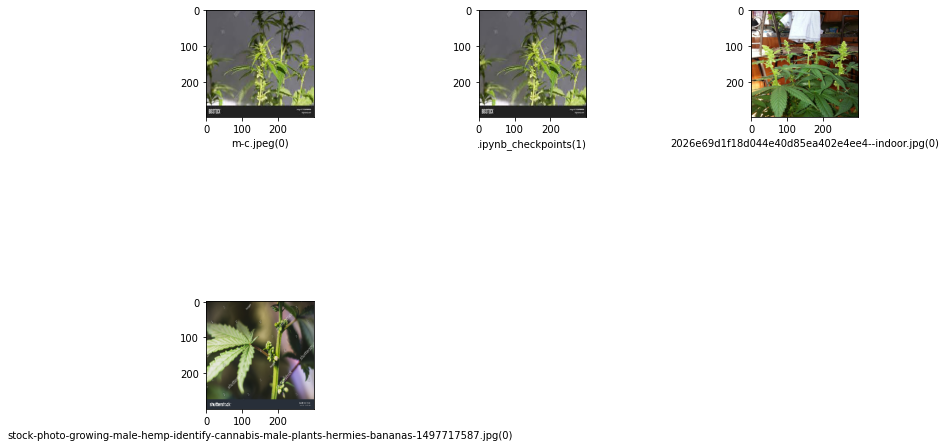

In [232]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    if not filename == ".ipynb_checkpoints":
      img = load_img("/content/gdrive/MyDrive/Cannabis/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [238]:
results={
    0:'female',
    1:'male'
}
from PIL import Image
import numpy as np
im=Image.open("/content/gdrive/MyDrive/Cannabis/img-a-predecir/m.jpeg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255

predict_x=model.predict(test_generator) 
classes_x=np.argmax(predict_x,axis=1)
if (sum(classes_x) > 0 ):
  print("macho")
else :
  print("hembra")

print(*classes_x)


1/1 [==============================] - 0s 109ms/step
macho
1 0 0 1
